Схема toy model в nengo-gui
![](1.png)

In [1]:
import plotly.graph_objects as go

import nengo
from nengo.processes import Piecewise
import time
start_time = time.time()

In [2]:
model = nengo.Network()

# Parameters
tau_synapse = 0.2

with model:
    err = nengo.Ensemble(n_neurons=100, dimensions=1, radius=1.1)
    layer1 = nengo.Ensemble(n_neurons=100, dimensions=1, radius=1.1)
    stim = nengo.Node(Piecewise({0: 0, 0.2: 1, 3: -1, 10: 0.5}))
    layer2 = nengo.Ensemble(n_neurons=100, dimensions=1, radius=1.1)
    nengo.Connection(stim,layer1)
    nengo.Connection(layer1, err)
    
    def forward(u):
        return tau_synapse*u
    # feedforward error
    nengo.Connection(err, layer2, function=forward, synapse=tau_synapse)
    
    def recurrent(x):
        return x
    nengo.Connection(layer2, layer2, function=recurrent, synapse=tau_synapse)
    nengo.Connection(layer2, err, transform=-1) # feedback to the error population

In [3]:
with model:
    layer1_probe = nengo.Probe(layer1, synapse=0.1)
    error_probe = nengo.Probe(err, synapse=0.1)
    layer2_probe = nengo.Probe(layer2, synapse=0.1)

In [4]:
# Create simulator
with nengo.Simulator(model) as sim:
    # Run it for 15 seconds
    sim.run(15)
    
# mem_usage = memory_usage(A)
end_time = time.time()
print(f"Время симуляции: {end_time - start_time} секунд")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Время симуляции: 1.026761531829834 секунд


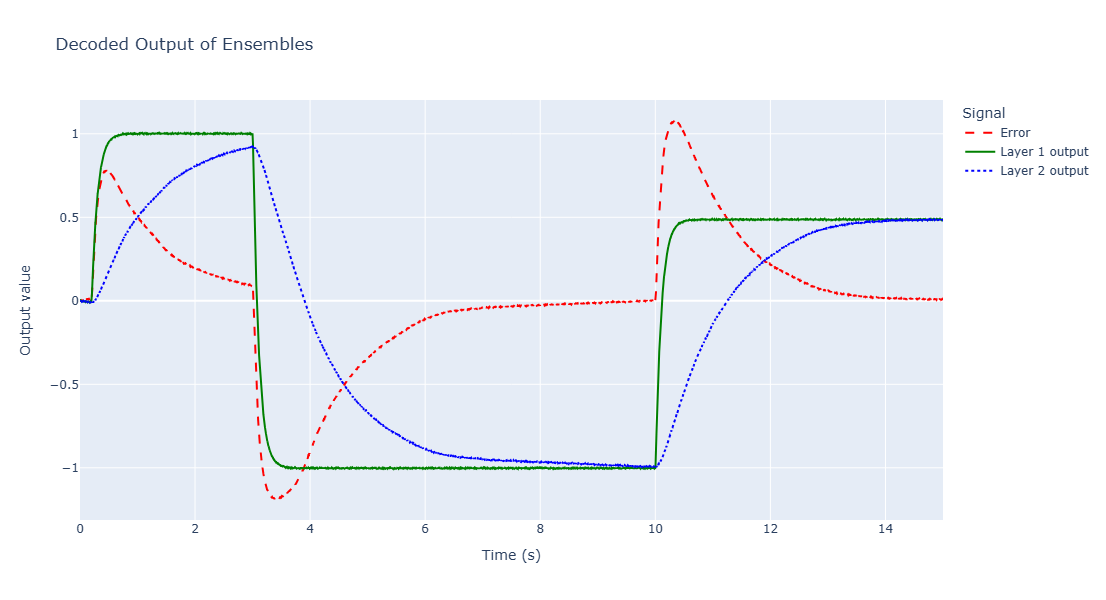

In [5]:
# Create Plotly figures
time = sim.trange()
error_data = sim.data[error_probe].flatten()
layer1_data = sim.data[layer1_probe].flatten()
layer2_data = sim.data[layer2_probe].flatten()

# RGB Plot
fig_rgb = go.Figure()
fig_rgb.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig_rgb.add_trace(go.Scatter(x=time, y=error_data, mode='lines', name='Error', line=dict(color='red', dash='dash')))
fig_rgb.add_trace(go.Scatter(x=time, y=layer1_data, mode='lines', name='Layer 1 output', line=dict(color='green')))
fig_rgb.add_trace(go.Scatter(x=time, y=layer2_data, mode='lines', name='Layer 2 output', line=dict(color='blue', dash='dot')))
fig_rgb.update_layout(title='Decoded Output of Ensembles', xaxis_title='Time (s)', yaxis_title='Output value',
                      legend_title='Signal')
fig_rgb.show()